Using Titanic dataset, to do the following:
a. Clean the data by dropping the column which has the largest number of missing values.
b. Find total number of passengers with age more than 30
c. Find total fare paid by passengers of second class
d. Compare number of survivors of each passenger class
e. Compute descriptive statistics for age attribute gender wise
f. Draw a scatter plot for passenger fare paid by Female and Male passengers separately
g. Compare density distribution for features age and passenger fare
h. Draw the pie chart for three groups labelled as class 1, class 2, class 3 respectively displayed in
different
colours. The occurrence of each group converted into percentage should be displayed in the pie
chart.
Appropriately Label the chart.
i. Find % of survived passengers for each class and answer the question “Did class play a role in
survival?”.

Total number of passengers with age more than 30 = 305
Total fare paid by the passengers of 2nd class = 3801.84
Pclass
1    136
2     87
3    119
Name: PassengerId, dtype: int64
        count       mean        std   min   25%   50%   75%   max
Sex                                                              
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0


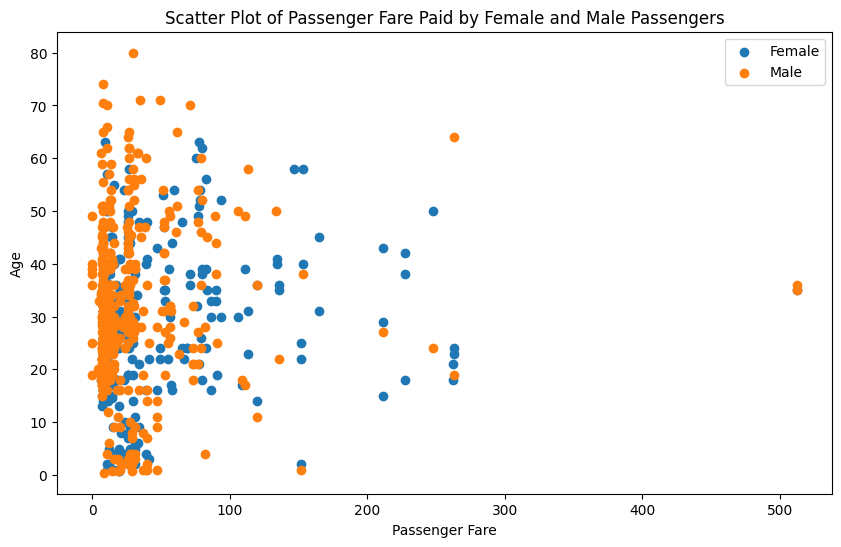

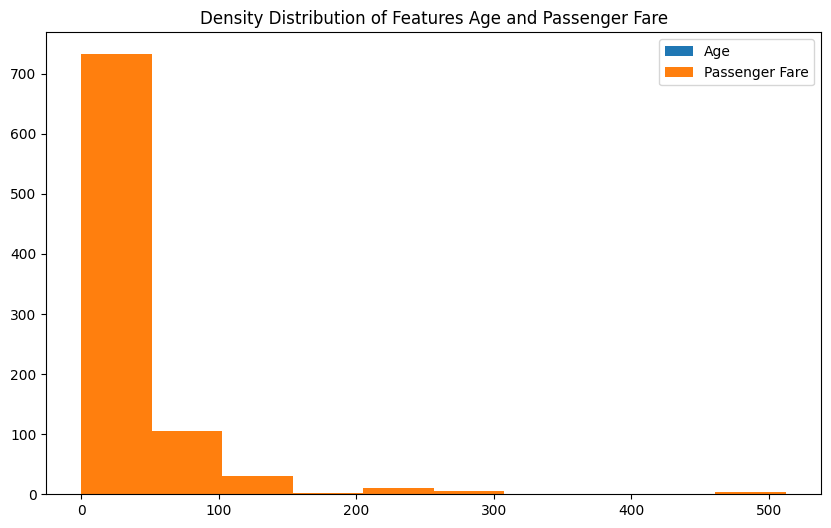

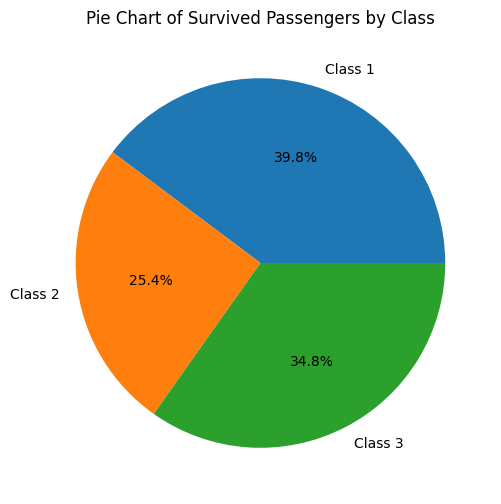

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the contents of the csv file into a pandas DataFrame
df=pd.read_csv("titanic.csv")

# Find the column with maximum number of missing values and drop it
max_missing_column = df.isnull().sum().idxmax()
df.drop(max_missing_column, axis = 1, inplace = True)

# Find the total number of passengers with age > 30
print(f"Total number of passengers with age more than 30 = {len([i for i in df['Age'] if i > 30])}")

# Create a slice of the original DataFrame where pclass > 2 and display the result
second_pclass = df[df['Pclass'] == 2]
print(f"Total fare paid by the passengers of 2nd class = {sum(second_pclass['Fare']):.2f}")

# Compare number of survivors of each passenger class
survivors_by_passenger_class = df[df['Survived'] == 1].groupby('Pclass')['PassengerId'].count()
print(df[df['Survived'] == 1].groupby('Pclass')['PassengerId'].count())

# descriptive statistics for age attribute gender wise 
print(df.groupby('Sex')['Age'].describe())

# Draw a scatter plot for passenger fare paid by Female and Male passengers separately
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Sex'] == 'female']['Fare'], df[df['Sex'] == 'female']['Age'], label='Female')
plt.scatter(df[df['Sex'] == 'male']['Fare'], df[df['Sex'] == 'male']['Age'], label='Male')
plt.xlabel('Passenger Fare')
plt.ylabel('Age')
plt.legend()
plt.title('Scatter Plot of Passenger Fare Paid by Female and Male Passengers')
plt.show()

# Compare density distribution for features age and passenger fare
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], label='Age')
plt.hist(df['Fare'], label='Passenger Fare')
plt.legend()
plt.title('Density Distribution of Features Age and Passenger Fare')
plt.show()

# Draw the pie chart for three groups labelled as class 1, class 2, class 3 respectively displayed in different colours. The occurrence of each group converted into percentage should be displayed in the pie chart.
# Appropriately Label the chart.
plt.figure(figsize=(10, 6))
plt.pie(survivors_by_passenger_class, labels=['Class 1', 'Class 2', 'Class 3'], autopct='%1.1f%%')
plt.title('Pie Chart of Survived Passengers by Class')
plt.show()

# i. Find % of survived passengers for each class and answer the question “Did class play a role in
# survival?”
survival_rate_by_passenger_class = df.groupby('Pclass')['Survived'].mean()

# Did class play a role in survival?
# Yes, class played a role in survival. Passengers of higher class were more likely to survive.
